## Forecasting forex using ARIMA for USD/VND 
#### Using data from past two years (2021 and 2022), we'll forecast data for 2023 to forecast for next 12 months (short time period)
The purpose of this research is to forecast usd/vnd exchnage rate to use in our investment analysis.

## Scraping historical currency exchange rate from yfinance

[*********************100%%**********************]  1 of 1 completed


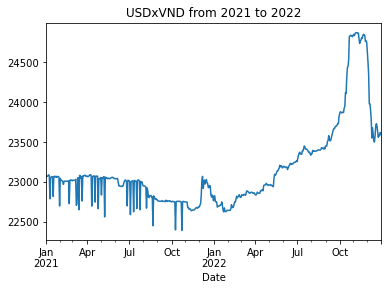

In [54]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Get data
data = yf.download('USDVND=X','2021-01-01','2022-12-31') # from 1 Jan 2021 to 31 December 2022

# Plot
%matplotlib inline
data['Adj Close'].plot()
plt.title("USDxVND from 2021 to 2022")
plt.show()

## Stationary test
Augmented Dickey-Fuller test for stationarity of data where a large p-value of >0.05 suggests data is non-stationary

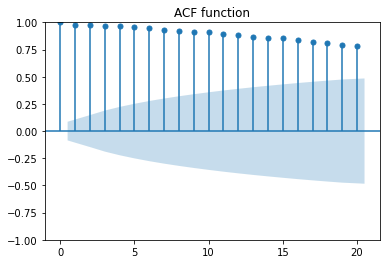

In [51]:
# Autocorrelation function (ACF) of data
plot_acf(data['Adj Close'], lags=20)
plt.title("ACF function")
plt.show()

If data is stationary, the ACF values is likely to drop off quickly

In [52]:
adftest = adfuller(data['Adj Close'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")


ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.418414303449322
P-Value: 0.369875833312992
Number of lags: 15
Number of observations: 505
Critical Values: {'1%': -3.9768094437936097, '5%': -3.419219645523007, '10%': -3.1321855644224357}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


P-value is 0.37 which is above 0.05, therefore the value is stationary

##### Differencing 

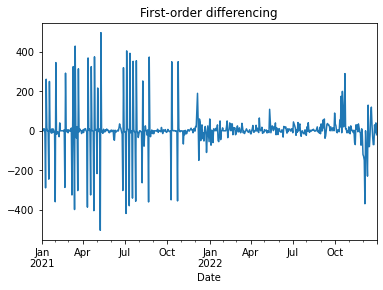

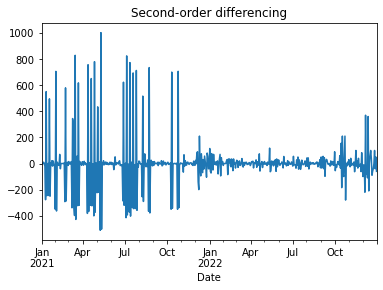

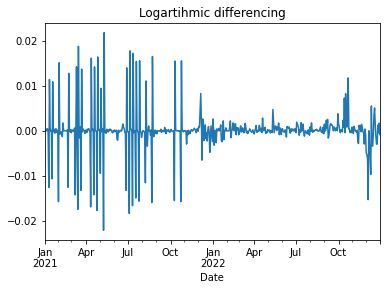

In [74]:
# First-order differencing
data['diff1'] = data['Adj Close'].diff()
data['diff1'].plot()
plt.title('First-order differencing')
plt.show()

# Second order differencing
data['diff2'] = data['Adj Close'].diff().diff()
data['diff2'].plot()
plt.title('Second-order differencing')
plt.show()

# Log differencing
data['difflog'] = np.log(data['Adj Close']).diff()
data['difflog'].plot()
plt.title('Logartihmic differencing')
plt.show()



##### Autocorrelation: Logarithmic transformation

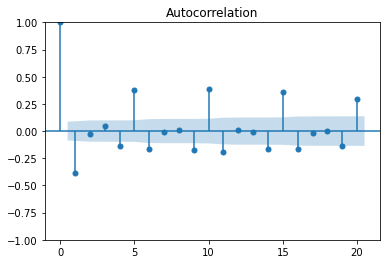

ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -5.132469461864634
P-Value: 5.794061613902588e-07
Number of lags: 14
Number of observations: 505
Critical Values {'1%': -2.570181548867758, '5%': -1.9415448335350545, '10%': -1.6163045045554647}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary


In [80]:
# Convert to growth rates by mutiplying by 100
data['growth'] = data['diff']*100

# ACF for growth series
plot_acf(data['growth'].dropna(), lags=20)
plt.show()

# Test stationarity with ADF
adftest = adfuller(data['growth'].dropna(), autolag = 'AIC', regression = 'n')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")


# ARIMA modelling